# Heart Failure Prediction

## Statement

**Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.**

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Problem

**Create a `Classification` model for predicting mortality caused by Heart Failure.** 

# Data Dictionary

* age = Age in years
* anaemia = Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)
* diabetes = If the patient has diabetes (boolean)
* ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure = If the patient has hypertension (boolean)
* platelets = Platelets in the blood (kiloplatelets/mL)
* serum_creatinine = Level of serum creatinine in the blood (mg/dL)
* serum_sodium = Level of serum sodium in the blood (mEq/L)
* sex = Woman or man (binary)
* smoking = If the patient smokes or not (boolean)
* time = Follow-up period (days)
* DEATH_EVENT = If the patient deceased during the follow-up period (boolean) **target**

# Approach

1. Data Exploratory Analysis
2. Data Cleaning
3. Modelling and Experimenting
4. Hyperparameter Tuning
5. Evaluation

## Tools

* Pandas
* NumPy
* Matplotlib
* Seaborn
* Scikit-Learn

# Preparing tools

In [1]:
# Import all the tools

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Exploratory Data Analysis

In [2]:
# Import the data
df = pd.read_csv("../data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Check for missing values

In [4]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Check Distribution of target (DEATH_EVENT)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

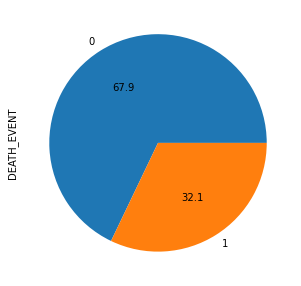

In [6]:
df.DEATH_EVENT.value_counts().plot.pie(figsize=(5,5), autopct='%1.1f');

<AxesSubplot:>

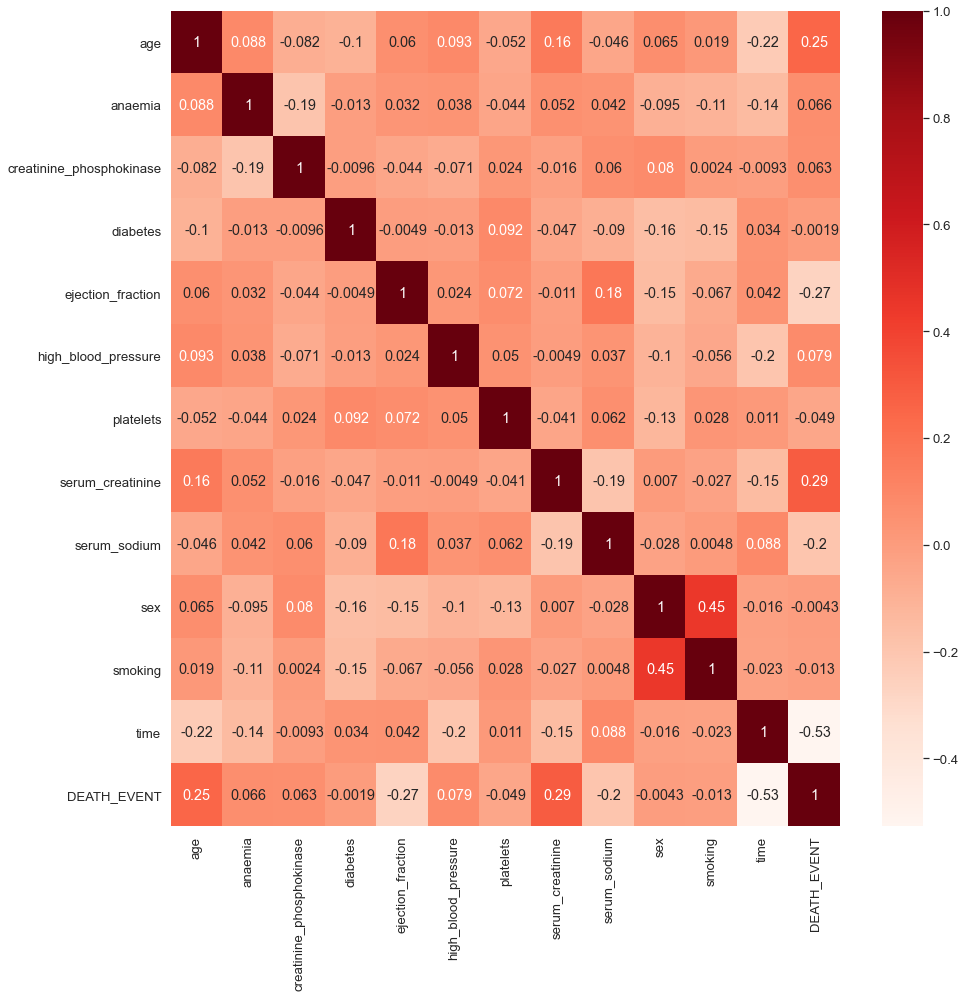

In [7]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),cmap='Reds', annot=True)

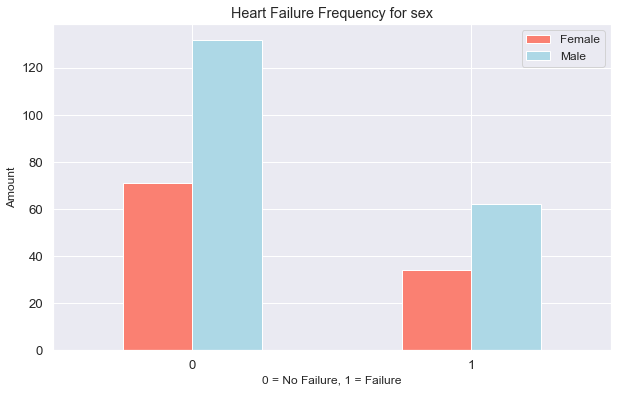

In [8]:
# Create a plot of crosstab
pd.crosstab(df.DEATH_EVENT, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Failure Frequency for sex")
plt.xlabel("0 = No Failure, 1 = Failure", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend(["Female", "Male"], fontsize=12)
plt.xticks(rotation=0);

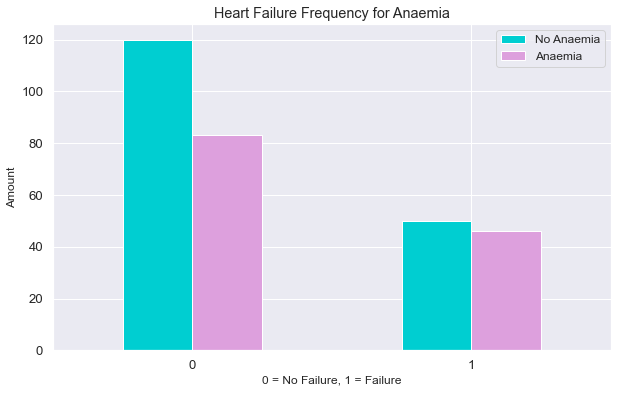

In [9]:
# Create a plot of crosstab
pd.crosstab(df.DEATH_EVENT, df.anaemia).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["darkturquoise", "plum"])
plt.title("Heart Failure Frequency for Anaemia")
plt.xlabel("0 = No Failure, 1 = Failure", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend(["No Anaemia", "Anaemia"], fontsize=12)
plt.xticks(rotation=0);

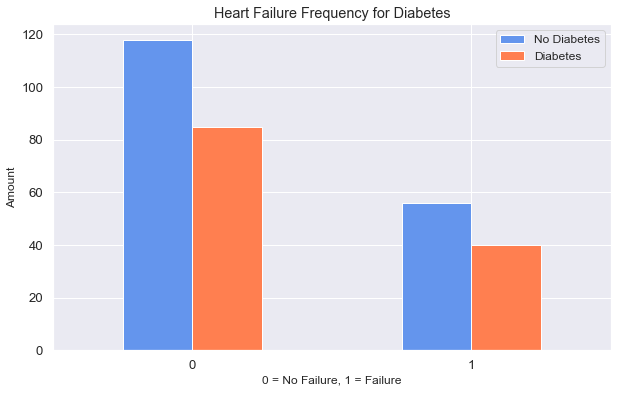

In [10]:
# Create a plot of crosstab
pd.crosstab(df.DEATH_EVENT, df.diabetes).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["cornflowerblue", "coral"])
plt.title("Heart Failure Frequency for Diabetes")
plt.xlabel("0 = No Failure, 1 = Failure", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend(["No Diabetes", "Diabetes"], fontsize=12)
plt.xticks(rotation=0);

# Experimenting

In [11]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Experimenting with `LogisticRegression`

In [4]:
# baseline model

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7666666666666667

# Hyperparameter Tuning for `Logistic Regression`

In [42]:
log_grid = {"C": np.logspace(-4, 4, 25),
            "solver": ["lbfgs", "liblinear"],
            "max_iter": [100,250,500,750, 1000, 2500, 5000, 7500, 10000]}

lg_reg_grid = GridSearchCV(LogisticRegression(),
                           param_grid=log_grid,
                           cv=5,
                           verbose=2)

lg_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] C=0.0001, max_iter=100, solver=lbfgs ............................
[CV] ............. C=0.0001, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=100, solver=lbfgs ............................
[CV] ............. C=0.0001, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=100, solver=lbfgs ............................
[CV] ............. C=0.0001, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=100, solver=lbfgs ............................
[CV] ............. C=0.0001, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=100, solver=lbfgs ............................
[CV] ............. C=0.0001, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=100, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=100, solver=liblinear ........................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ......... C=0.0001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=250, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=250, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=250, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=250, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=500, solver=lbfgs ............................
[CV] ............. C=0.0001, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=500, solver=lbfgs ............................
[CV] ............. C=0.0001, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=500, solver=lbfgs ............................
[CV] .

[CV] ........ C=0.0001, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=7500, solver=liblinear .......................
[CV] ........ C=0.0001, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=7500, solver=liblinear .......................
[CV] ........ C=0.0001, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=7500, solver=liblinear .......................
[CV] ........ C=0.0001, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=7500, solver=liblinear .......................
[CV] ........ C=0.0001, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=10000, solver=lbfgs ..........................
[CV] ........... C=0.0001, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=10000, solver=lbfgs ..........................
[CV] ........... C=0.0001, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.0001, max_iter=10000, solver=lbfgs ..........................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV]  C=0.00021544346900318845, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=100, solver=liblinear ........
[CV]  C=0.00021544346900318845, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=100, solver=liblinear ........
[CV]  C=0.00021544346900318845, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=100, solver=liblinear ........
[CV]  C=0.00021544346900318845, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=100, solver=liblinear ........
[CV]  C=0.00021544346900318845, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=100, solver=liblinear ........
[CV]  C=0.00021544346900318845, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=250, solver=lbfgs ............
[CV]  C=0.00021544346900318845, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.00021544346900318845, max_i

[CV]  C=0.00021544346900318845, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=5000, solver=lbfgs ...........
[CV]  C=0.00021544346900318845, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=5000, solver=lbfgs ...........
[CV]  C=0.00021544346900318845, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=5000, solver=lbfgs ...........
[CV]  C=0.00021544346900318845, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=5000, solver=liblinear .......
[CV]  C=0.00021544346900318845, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=5000, solver=liblinear .......
[CV]  C=0.00021544346900318845, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_iter=5000, solver=liblinear .......
[CV]  C=0.00021544346900318845, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.00021544346900318845, max_it

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l


[CV] C=0.00046415888336127773, max_iter=100, solver=liblinear ........
[CV]  C=0.00046415888336127773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=100, solver=liblinear ........
[CV]  C=0.00046415888336127773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=100, solver=liblinear ........
[CV]  C=0.00046415888336127773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=100, solver=liblinear ........
[CV]  C=0.00046415888336127773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=100, solver=liblinear ........
[CV]  C=0.00046415888336127773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=250, solver=lbfgs ............
[CV]  C=0.00046415888336127773, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=250, solver=lbfgs ............
[CV]  C=0.00046415888336127773, max_it

[CV]  C=0.00046415888336127773, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=5000, solver=lbfgs ...........
[CV]  C=0.00046415888336127773, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=5000, solver=lbfgs ...........
[CV]  C=0.00046415888336127773, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=5000, solver=lbfgs ...........
[CV]  C=0.00046415888336127773, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=5000, solver=liblinear .......
[CV]  C=0.00046415888336127773, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=5000, solver=liblinear .......
[CV]  C=0.00046415888336127773, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_iter=5000, solver=liblinear .......
[CV]  C=0.00046415888336127773, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.00046415888336127773, max_it

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] .............. C=0.001, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.001, max_iter=250, solver=lbfgs .............................
[CV] .............. C=0.001, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.001, max_iter=250, solver=liblinear .........................
[CV] .......... C=0.001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=250, solver=liblinear .........................
[CV] .......... C=0.001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=250, solver=liblinear .........................
[CV] .......... C=0.001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=250, solver=liblinear .........................
[CV] .......... C=0.001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=250, solver=liblinear .........................
[CV] .......... C=0.001, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=500, solver=lbfgs .............................
[CV] .

[CV] ............ C=0.001, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=lbfgs ...........................
[CV] ............ C=0.001, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=lbfgs ...........................
[CV] ............ C=0.001, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=liblinear .......................
[CV] ........ C=0.001, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=liblinear .......................
[CV] ........ C=0.001, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=liblinear .......................
[CV] ........ C=0.001, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=liblinear .......................
[CV] ........ C=0.001, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=liblinear .......................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l


[CV] C=0.002154434690031882, max_iter=250, solver=lbfgs ..............
[CV]  C=0.002154434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=250, solver=lbfgs ..............
[CV]  C=0.002154434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=250, solver=lbfgs ..............
[CV]  C=0.002154434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=250, solver=lbfgs ..............
[CV]  C=0.002154434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=250, solver=liblinear ..........
[CV]  C=0.002154434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.002154434690031882, max_iter=250, solver=liblinear ..........
[CV]  C=0.002154434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.002154434690031882, max_iter=250, solver=liblinear ..........
[CV]  C=0.002154434690031882, max_iter=250, solver=liblinear, 

[CV]  C=0.002154434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=10000, solver=lbfgs ............
[CV]  C=0.002154434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=10000, solver=lbfgs ............
[CV]  C=0.002154434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=10000, solver=lbfgs ............
[CV]  C=0.002154434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=10000, solver=lbfgs ............
[CV]  C=0.002154434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.002154434690031882, max_iter=10000, solver=liblinear ........
[CV]  C=0.002154434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.002154434690031882, max_iter=10000, solver=liblinear ........
[CV]  C=0.002154434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.002154434690031882, max_iter=10000, sol

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV]  C=0.004641588833612777, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.004641588833612777, max_iter=250, solver=lbfgs ..............
[CV]  C=0.004641588833612777, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.004641588833612777, max_iter=250, solver=lbfgs ..............
[CV]  C=0.004641588833612777, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.004641588833612777, max_iter=250, solver=lbfgs ..............
[CV]  C=0.004641588833612777, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.004641588833612777, max_iter=250, solver=lbfgs ..............
[CV]  C=0.004641588833612777, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.004641588833612777, max_iter=250, solver=liblinear ..........
[CV]  C=0.004641588833612777, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.004641588833612777, max_iter=250, solver=liblinear ..........
[CV]  C=0.004641588833612777, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.004641588833612777, max_iter=250, solver=liblinear ..

[CV]  C=0.004641588833612777, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.004641588833612777, max_iter=7500, solver=liblinear .........
[CV]  C=0.004641588833612777, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.004641588833612777, max_iter=7500, solver=liblinear .........
[CV]  C=0.004641588833612777, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.004641588833612777, max_iter=7500, solver=liblinear .........
[CV]  C=0.004641588833612777, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.004641588833612777, max_iter=7500, solver=liblinear .........
[CV]  C=0.004641588833612777, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.004641588833612777, max_iter=7500, solver=liblinear .........
[CV]  C=0.004641588833612777, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.004641588833612777, max_iter=10000, solver=lbfgs ............
[CV]  C=0.004641588833612777, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.004641588833612777, max_iter=1000

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l


[CV] C=0.01, max_iter=100, solver=lbfgs ..............................
[CV] ............... C=0.01, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=100, solver=lbfgs ..............................
[CV] ............... C=0.01, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=100, solver=liblinear ..........................
[CV] ........... C=0.01, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.01, max_iter=100, solver=liblinear ..........................
[CV] ........... C=0.01, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.01, max_iter=100, solver=liblinear ..........................
[CV] ........... C=0.01, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.01, max_iter=100, solver=liblinear ..........................
[CV] ........... C=0.01, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.01, max_iter=100, solver=liblinear ..........................
[CV] ........... C=0.01, max_iter=100, solver=liblinear, total=   0.0s
[CV] 

[CV] .............. C=0.01, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=7500, solver=lbfgs .............................
[CV] .............. C=0.01, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=7500, solver=lbfgs .............................
[CV] .............. C=0.01, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=7500, solver=lbfgs .............................
[CV] .............. C=0.01, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=7500, solver=liblinear .........................
[CV] .......... C=0.01, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.01, max_iter=7500, solver=liblinear .........................
[CV] .......... C=0.01, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.01, max_iter=7500, solver=liblinear .........................
[CV] .......... C=0.01, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.01, max_iter=7500, solver=liblinear .........................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV]  C=0.021544346900318822, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.021544346900318822, max_iter=250, solver=liblinear ..........
[CV]  C=0.021544346900318822, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.021544346900318822, max_iter=250, solver=liblinear ..........
[CV]  C=0.021544346900318822, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.021544346900318822, max_iter=500, solver=lbfgs ..............
[CV]  C=0.021544346900318822, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=0.021544346900318822, max_iter=500, solver=lbfgs ..............
[CV]  C=0.021544346900318822, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=0.021544346900318822, max_iter=500, solver=lbfgs ..............
[CV]  C=0.021544346900318822, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=0.021544346900318822, max_iter=500, solver=lbfgs ..............
[CV]  C=0.021544346900318822, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=0.021544346900318822, max_iter=500, solver=lbfgs ..

[CV]  C=0.021544346900318822, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.021544346900318822, max_iter=10000, solver=liblinear ........
[CV]  C=0.021544346900318822, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.021544346900318822, max_iter=10000, solver=liblinear ........
[CV]  C=0.021544346900318822, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.021544346900318822, max_iter=10000, solver=liblinear ........
[CV]  C=0.021544346900318822, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.021544346900318822, max_iter=10000, solver=liblinear ........
[CV]  C=0.021544346900318822, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.021544346900318822, max_iter=10000, solver=liblinear ........
[CV]  C=0.021544346900318822, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=100, solver=lbfgs ..............
[CV]  C=0.046415888336127774, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.046415888336127774, max_iter=

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[CV] C=0.046415888336127774, max_iter=250, solver=liblinear ..........
[CV]  C=0.046415888336127774, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=250, solver=liblinear ..........
[CV]  C=0.046415888336127774, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=250, solver=liblinear ..........
[CV]  C=0.046415888336127774, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=250, solver=liblinear ..........
[CV]  C=0.046415888336127774, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=250, solver=liblinear ..........
[CV]  C=0.046415888336127774, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=500, solver=lbfgs ..............
[CV]  C=0.046415888336127774, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=0.046415888336127774, max_iter=500, solver=lbfgs ..............
[CV]  C=0.046415888336127774, max_iter=500, solver

[CV]  C=0.046415888336127774, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.046415888336127774, max_iter=7500, solver=lbfgs .............
[CV]  C=0.046415888336127774, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.046415888336127774, max_iter=7500, solver=liblinear .........
[CV]  C=0.046415888336127774, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=7500, solver=liblinear .........
[CV]  C=0.046415888336127774, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=7500, solver=liblinear .........
[CV]  C=0.046415888336127774, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=7500, solver=liblinear .........
[CV]  C=0.046415888336127774, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=7500, solver=liblinear .........
[CV]  C=0.046415888336127774, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.046415888336127774, max_iter=10000

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ C=0.1, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, solver=lbfgs ...............................
[CV] ................ C=0.1, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=250, solver=lbfgs ...............................
[CV] .

[CV] ............... C=0.1, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=5000, solver=lbfgs ..............................
[CV] ............... C=0.1, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=5000, solver=lbfgs ..............................
[CV] ............... C=0.1, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=5000, solver=lbfgs ..............................
[CV] ............... C=0.1, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=0.1, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=0.1, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=0.1, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=5000, solver=liblinear ..........................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.21544346900318823, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.21544346900318823, max_iter=250, solver=lbfgs ...............
[CV]  C=0.21544346900318823, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.21544346900318823, max_iter=250, solver=lbfgs ...............
[CV]  C=0.21544346900318823, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.21544346900318823, max_iter=250, solver=lbfgs ...............
[CV]  C=0.21544346900318823, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.21544346900318823, max_iter=250, solver=lbfgs ...............
[CV]  C=0.21544346900318823, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.21544346900318823, max_iter=250, solver=liblinear ...........
[CV]  C=0.21544346900318823, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.21544346900318823, max_iter=250, solver=liblinear ...........
[CV]  C=0.21544346900318823, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.21544346900318823, max_iter=250, solver=liblinear ..........

[CV]  C=0.21544346900318823, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.21544346900318823, max_iter=10000, solver=lbfgs .............
[CV]  C=0.21544346900318823, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=0.21544346900318823, max_iter=10000, solver=liblinear .........
[CV]  C=0.21544346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.21544346900318823, max_iter=10000, solver=liblinear .........
[CV]  C=0.21544346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.21544346900318823, max_iter=10000, solver=liblinear .........
[CV]  C=0.21544346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.21544346900318823, max_iter=10000, solver=liblinear .........
[CV]  C=0.21544346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.21544346900318823, max_iter=10000, solver=liblinear .........
[CV]  C=0.21544346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=100, s

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV]  C=0.46415888336127775, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.46415888336127775, max_iter=250, solver=lbfgs ...............
[CV]  C=0.46415888336127775, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=0.46415888336127775, max_iter=250, solver=liblinear ...........
[CV]  C=0.46415888336127775, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=250, solver=liblinear ...........
[CV]  C=0.46415888336127775, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=250, solver=liblinear ...........
[CV]  C=0.46415888336127775, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=250, solver=liblinear ...........
[CV]  C=0.46415888336127775, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=250, solver=liblinear ...........
[CV]  C=0.46415888336127775, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=500, solver=lbfgs ..

[CV]  C=0.46415888336127775, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.46415888336127775, max_iter=7500, solver=lbfgs ..............
[CV]  C=0.46415888336127775, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.46415888336127775, max_iter=7500, solver=lbfgs ..............
[CV]  C=0.46415888336127775, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=0.46415888336127775, max_iter=7500, solver=liblinear ..........
[CV]  C=0.46415888336127775, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=7500, solver=liblinear ..........
[CV]  C=0.46415888336127775, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=7500, solver=liblinear ..........
[CV]  C=0.46415888336127775, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=7500, solver=liblinear ..........
[CV]  C=0.46415888336127775, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=0.46415888336127775, max_iter=7500, solver=libl

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] ................ C=1.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1.0, max_iter=100, solver=lbfgs ...............................
[CV] ................ C=1.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1.0, max_iter=100, solver=lbfgs ...............................
[CV] ................ C=1.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1.0, max_iter=100, solver=lbfgs ...............................
[CV] ................ C=1.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1.0, max_iter=100, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=100, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=100, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=100, solver=liblinear ...........................
[CV] .

[CV] ............... C=1.0, max_iter=5000, solver=lbfgs, total=   0.0s
[CV] C=1.0, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=1.0, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=1.0, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=1.0, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=1.0, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=5000, solver=liblinear ..........................
[CV] ........... C=1.0, max_iter=5000, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=7500, solver=lbfgs ..............................
[CV] ............... C=1.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=1.0, max_iter=7500, solver=lbfgs ..............................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] .. C=2.154434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=2.154434690031882, max_iter=250, solver=lbfgs .................
[CV] .. C=2.154434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=2.154434690031882, max_iter=250, solver=lbfgs .................
[CV] .. C=2.154434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=2.154434690031882, max_iter=250, solver=liblinear .............
[CV]  C=2.154434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=250, solver=liblinear .............
[CV]  C=2.154434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=250, solver=liblinear .............
[CV]  C=2.154434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=250, solver=liblinear .............
[CV]  C=2.154434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=250, solver=liblinear ............

[CV]  C=2.154434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=2.154434690031882, max_iter=10000, solver=lbfgs ...............
[CV]  C=2.154434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=2.154434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=2.154434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=2.154434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=2.154434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=2.154434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=2.154434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=2.154434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=100, solver=lbfgs ....

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .. C=4.641588833612772, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=4.641588833612772, max_iter=250, solver=lbfgs .................
[CV] .. C=4.641588833612772, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=4.641588833612772, max_iter=250, solver=liblinear .............
[CV]  C=4.641588833612772, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=250, solver=liblinear .............
[CV]  C=4.641588833612772, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=250, solver=liblinear .............
[CV]  C=4.641588833612772, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=250, solver=liblinear .............
[CV]  C=4.641588833612772, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=250, solver=liblinear .............
[CV]  C=4.641588833612772, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=500, solver=lbfgs ..............

[CV]  C=4.641588833612772, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=10000, solver=liblinear ...........
[CV]  C=4.641588833612772, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=10000, solver=liblinear ...........
[CV]  C=4.641588833612772, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=10000, solver=liblinear ...........
[CV]  C=4.641588833612772, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=4.641588833612772, max_iter=10000, solver=liblinear ...........
[CV]  C=4.641588833612772, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=100, solver=lbfgs ..............................
[CV] ............... C=10.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=10.0, max_iter=100, solver=lbfgs ..............................
[CV] ............... C=10.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=10.0, max_iter=100, solver=lbfgs .................

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] ............... C=10.0, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=10.0, max_iter=250, solver=lbfgs ..............................
[CV] ............... C=10.0, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=10.0, max_iter=250, solver=liblinear ..........................
[CV] ........... C=10.0, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=250, solver=liblinear ..........................
[CV] ........... C=10.0, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=250, solver=liblinear ..........................
[CV] ........... C=10.0, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=250, solver=liblinear ..........................
[CV] ........... C=10.0, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=250, solver=liblinear ..........................
[CV] ........... C=10.0, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=500, solver=lbfgs ..............................
[CV] .

[CV] ............. C=10.0, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=10.0, max_iter=10000, solver=lbfgs ............................
[CV] ............. C=10.0, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=10.0, max_iter=10000, solver=liblinear ........................
[CV] ......... C=10.0, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=10000, solver=liblinear ........................
[CV] ......... C=10.0, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=10000, solver=liblinear ........................
[CV] ......... C=10.0, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=10000, solver=liblinear ........................
[CV] ......... C=10.0, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=10.0, max_iter=10000, solver=liblinear ........................
[CV] ......... C=10.0, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=100, solver=lbfgs .................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] .. C=21.54434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=21.54434690031882, max_iter=250, solver=lbfgs .................
[CV] .. C=21.54434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=21.54434690031882, max_iter=250, solver=lbfgs .................
[CV] .. C=21.54434690031882, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=21.54434690031882, max_iter=250, solver=liblinear .............
[CV]  C=21.54434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=250, solver=liblinear .............
[CV]  C=21.54434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=250, solver=liblinear .............
[CV]  C=21.54434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=250, solver=liblinear .............
[CV]  C=21.54434690031882, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=250, solver=liblinear ............

[CV]  C=21.54434690031882, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=21.54434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=21.54434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=21.54434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=21.54434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=21.54434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=21.54434690031882, max_iter=10000, solver=liblinear ...........
[CV]  C=21.54434690031882, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=100, solver=lbfgs .................
[CV] .. C=46.41588833612773, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=46.41588833612773, max_iter=100, solver=lbfgs ....

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] .. C=46.41588833612773, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=46.41588833612773, max_iter=250, solver=liblinear .............
[CV]  C=46.41588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=250, solver=liblinear .............
[CV]  C=46.41588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=250, solver=liblinear .............
[CV]  C=46.41588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=250, solver=liblinear .............
[CV]  C=46.41588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=250, solver=liblinear .............
[CV]  C=46.41588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=500, solver=lbfgs .................
[CV] .. C=46.41588833612773, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=46.41588833612773, max_iter=500, solver=lbfgs ..............

[CV] . C=46.41588833612773, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=46.41588833612773, max_iter=7500, solver=lbfgs ................
[CV] . C=46.41588833612773, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=46.41588833612773, max_iter=7500, solver=lbfgs ................
[CV] . C=46.41588833612773, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=46.41588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=46.41588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=46.41588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=46.41588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=46.41588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=46.41588833612773, max_iter=7500, solver=liblinear .......

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] .............. C=100.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=100.0, max_iter=100, solver=lbfgs .............................
[CV] .............. C=100.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=100.0, max_iter=100, solver=lbfgs .............................
[CV] .............. C=100.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=100.0, max_iter=100, solver=lbfgs .............................
[CV] .............. C=100.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=100.0, max_iter=100, solver=liblinear .........................
[CV] .......... C=100.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=100.0, max_iter=100, solver=liblinear .........................
[CV] .......... C=100.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=100.0, max_iter=100, solver=liblinear .........................
[CV] .......... C=100.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=100.0, max_iter=100, solver=liblinear .........................
[CV] .

[CV] ............. C=100.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=100.0, max_iter=7500, solver=lbfgs ............................
[CV] ............. C=100.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=100.0, max_iter=7500, solver=lbfgs ............................
[CV] ............. C=100.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=100.0, max_iter=7500, solver=liblinear ........................
[CV] ......... C=100.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=100.0, max_iter=7500, solver=liblinear ........................
[CV] ......... C=100.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=100.0, max_iter=7500, solver=liblinear ........................
[CV] ......... C=100.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=100.0, max_iter=7500, solver=liblinear ........................
[CV] ......... C=100.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=100.0, max_iter=7500, solver=liblinear ........................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV]  C=215.44346900318823, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=250, solver=liblinear ............
[CV]  C=215.44346900318823, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=250, solver=liblinear ............
[CV]  C=215.44346900318823, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=250, solver=liblinear ............
[CV]  C=215.44346900318823, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=250, solver=liblinear ............
[CV]  C=215.44346900318823, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=500, solver=lbfgs ................
[CV] . C=215.44346900318823, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=215.44346900318823, max_iter=500, solver=lbfgs ................
[CV] . C=215.44346900318823, max_iter=500, solver=lbfgs, total=   0.0s
[CV] C=215.44346900318823, max_iter=500, solver=lbfgs ........

[CV]  C=215.44346900318823, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=215.44346900318823, max_iter=10000, solver=lbfgs ..............
[CV]  C=215.44346900318823, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=215.44346900318823, max_iter=10000, solver=lbfgs ..............
[CV]  C=215.44346900318823, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=215.44346900318823, max_iter=10000, solver=liblinear ..........
[CV]  C=215.44346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=10000, solver=liblinear ..........
[CV]  C=215.44346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=10000, solver=liblinear ..........
[CV]  C=215.44346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=10000, solver=liblinear ..........
[CV]  C=215.44346900318823, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=215.44346900318823, max_iter=10000, solver=libl

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] .. C=464.1588833612773, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=464.1588833612773, max_iter=250, solver=lbfgs .................
[CV] .. C=464.1588833612773, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=464.1588833612773, max_iter=250, solver=lbfgs .................
[CV] .. C=464.1588833612773, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=464.1588833612773, max_iter=250, solver=liblinear .............
[CV]  C=464.1588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=250, solver=liblinear .............
[CV]  C=464.1588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=250, solver=liblinear .............
[CV]  C=464.1588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=250, solver=liblinear .............
[CV]  C=464.1588833612773, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=250, solver=liblinear ............

[CV] . C=464.1588833612773, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=464.1588833612773, max_iter=7500, solver=lbfgs ................
[CV] . C=464.1588833612773, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=464.1588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=464.1588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=464.1588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=464.1588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=464.1588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=7500, solver=liblinear ............
[CV]  C=464.1588833612773, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=464.1588833612773, max_iter=10000, solver=lbfgs .......

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] ............. C=1000.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=100, solver=lbfgs ............................
[CV] ............. C=1000.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=100, solver=lbfgs ............................
[CV] ............. C=1000.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=100, solver=lbfgs ............................
[CV] ............. C=1000.0, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=100, solver=liblinear ........................
[CV] ......... C=1000.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1000.0, max_iter=100, solver=liblinear ........................
[CV] ......... C=1000.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1000.0, max_iter=100, solver=liblinear ........................
[CV] ......... C=1000.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1000.0, max_iter=100, solver=liblinear ........................
[CV] .

[CV] ............ C=1000.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=7500, solver=lbfgs ...........................
[CV] ............ C=1000.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=7500, solver=lbfgs ...........................
[CV] ............ C=1000.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=7500, solver=lbfgs ...........................
[CV] ............ C=1000.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=7500, solver=lbfgs ...........................
[CV] ............ C=1000.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=1000.0, max_iter=7500, solver=liblinear .......................
[CV] ........ C=1000.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=1000.0, max_iter=7500, solver=liblinear .......................
[CV] ........ C=1000.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=1000.0, max_iter=7500, solver=liblinear .......................
[CV] .

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] . C=2154.4346900318824, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=2154.4346900318824, max_iter=250, solver=lbfgs ................
[CV] . C=2154.4346900318824, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=2154.4346900318824, max_iter=250, solver=lbfgs ................
[CV] . C=2154.4346900318824, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=2154.4346900318824, max_iter=250, solver=lbfgs ................
[CV] . C=2154.4346900318824, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=2154.4346900318824, max_iter=250, solver=liblinear ............
[CV]  C=2154.4346900318824, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=2154.4346900318824, max_iter=250, solver=liblinear ............
[CV]  C=2154.4346900318824, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=2154.4346900318824, max_iter=250, solver=liblinear ............
[CV]  C=2154.4346900318824, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=2154.4346900318824, max_iter=250, solver=liblinear ..........

[CV]  C=2154.4346900318824, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=2154.4346900318824, max_iter=7500, solver=liblinear ...........
[CV]  C=2154.4346900318824, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=2154.4346900318824, max_iter=7500, solver=liblinear ...........
[CV]  C=2154.4346900318824, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=2154.4346900318824, max_iter=7500, solver=liblinear ...........
[CV]  C=2154.4346900318824, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=2154.4346900318824, max_iter=10000, solver=lbfgs ..............
[CV]  C=2154.4346900318824, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=2154.4346900318824, max_iter=10000, solver=lbfgs ..............
[CV]  C=2154.4346900318824, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=2154.4346900318824, max_iter=10000, solver=lbfgs ..............
[CV]  C=2154.4346900318824, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=2154.4346900318824, max_iter=10000, solver=lbfgs ..

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] .. C=4641.588833612773, max_iter=100, solver=lbfgs, total=   0.0s
[CV] C=4641.588833612773, max_iter=100, solver=liblinear .............
[CV]  C=4641.588833612773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=4641.588833612773, max_iter=100, solver=liblinear .............
[CV]  C=4641.588833612773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=4641.588833612773, max_iter=100, solver=liblinear .............
[CV]  C=4641.588833612773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=4641.588833612773, max_iter=100, solver=liblinear .............
[CV]  C=4641.588833612773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=4641.588833612773, max_iter=100, solver=liblinear .............
[CV]  C=4641.588833612773, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=4641.588833612773, max_iter=250, solver=lbfgs .................
[CV] .. C=4641.588833612773, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=4641.588833612773, max_iter=250, solver=lbfgs ..............

[CV]  C=4641.588833612773, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=4641.588833612773, max_iter=10000, solver=lbfgs ...............
[CV]  C=4641.588833612773, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=4641.588833612773, max_iter=10000, solver=lbfgs ...............
[CV]  C=4641.588833612773, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=4641.588833612773, max_iter=10000, solver=lbfgs ...............
[CV]  C=4641.588833612773, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=4641.588833612773, max_iter=10000, solver=lbfgs ...............
[CV]  C=4641.588833612773, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=4641.588833612773, max_iter=10000, solver=liblinear ...........
[CV]  C=4641.588833612773, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=4641.588833612773, max_iter=10000, solver=liblinear ...........
[CV]  C=4641.588833612773, max_iter=10000, solver=liblinear, total=   0.0s
[CV] C=4641.588833612773, max_iter=10000, solver=liblinear ..........

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l


[CV] C=10000.0, max_iter=100, solver=liblinear .......................
[CV] ........ C=10000.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=100, solver=liblinear .......................
[CV] ........ C=10000.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=100, solver=liblinear .......................
[CV] ........ C=10000.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=100, solver=liblinear .......................
[CV] ........ C=10000.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=250, solver=lbfgs ...........................
[CV] ............ C=10000.0, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=10000.0, max_iter=250, solver=lbfgs ...........................
[CV] ............ C=10000.0, max_iter=250, solver=lbfgs, total=   0.0s
[CV] C=10000.0, max_iter=250, solver=lbfgs ...........................
[CV] ............ C=10000.0, max_iter=250, solver=lbfgs, total=   0.0s
[CV] 

[CV] ........... C=10000.0, max_iter=7500, solver=lbfgs, total=   0.0s
[CV] C=10000.0, max_iter=7500, solver=liblinear ......................
[CV] ....... C=10000.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=7500, solver=liblinear ......................
[CV] ....... C=10000.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=7500, solver=liblinear ......................
[CV] ....... C=10000.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=7500, solver=liblinear ......................
[CV] ....... C=10000.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=7500, solver=liblinear ......................
[CV] ....... C=10000.0, max_iter=7500, solver=liblinear, total=   0.0s
[CV] C=10000.0, max_iter=10000, solver=lbfgs .........................
[CV] .......... C=10000.0, max_iter=10000, solver=lbfgs, total=   0.0s
[CV] C=10000.0, max_iter=10000, solver=lbfgs .........................
[CV] .

[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:   24.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                         'max_iter': [100, 250, 500, 750, 1000, 2500, 5000,
                                      7500, 10000],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=2)

In [47]:
lg_reg_grid.best_estimator_

LogisticRegression(C=0.00021544346900318845, solver='liblinear')

In [48]:
lg_reg_grid.best_estimator_.score(X_test, y_test)

0.8166666666666667

In [12]:
# Tuned model

clf = LogisticRegression(C=0.00021544346900318845, solver='liblinear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8166666666666667

In [37]:
# Function for computing cross-validated evaluation metrics
def cross_validation_report(model, X_train, y_train, k):
    '''
    This function computes the cross-validated
    Accuracy, Precision, Recall, F1-Score and AUC Score
    of a given model, accross k folds.
    '''
    
    cross_acc = cross_val_score(model, X_train, y_train, cv=k, scoring="accuracy")
    cross_prec = cross_val_score(model, X_train, y_train, cv=k, scoring="precision")
    cross_recall = cross_val_score(model, X_train, y_train, cv=k, scoring="recall")
    cross_f1 = cross_val_score(model, X_train, y_train, cv=k, scoring="f1")
    cross_auc = cross_val_score(model, X_train, y_train, cv=k, scoring="roc_auc")
    
    metrics = {"Accuracy": cross_acc.mean(),
               "Precision": cross_prec.mean(),
               "Recall": cross_recall.mean(),
               "F1 Score": cross_f1.mean(),
               "AUC Score": cross_auc.mean()}
    return metrics
    

## Using the tuned hyperparameters to make a `LogisticRegression()` model cross-validated across the entire data

# Cross-validated Metrics

In [38]:
cv_log_reg = LogisticRegression(C=0.00021544346900318845, max_iter=10000, solver='liblinear')

metrics = cross_validation_report(cv_log_reg, X_train, y_train, 5)
metrics

{'Accuracy': 0.8449468085106384,
 'Precision': 0.8366310160427808,
 'Recall': 0.6171428571428572,
 'F1 Score': 0.7001343873517787,
 'AUC Score': 0.838177574059927}

# Evaluating on the test set

In [13]:
y_preds = clf.predict(X_test)
s1=accuracy_score(y_test, y_preds)
s1

0.8166666666666667

## Make Confusion Matrix

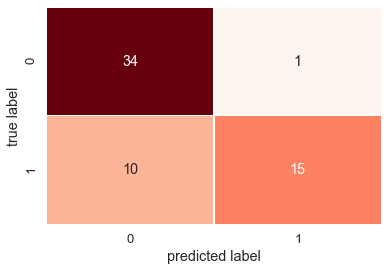

In [14]:
sns.set(font_scale=1.2)
log_reg_conf = confusion_matrix(y_test, y_preds)
sns.heatmap(log_reg_conf, annot=True, fmt='d', linewidths=.5,  
            cmap="Reds", cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

## Make Classification Report

In [15]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



# Plot ROC Curve

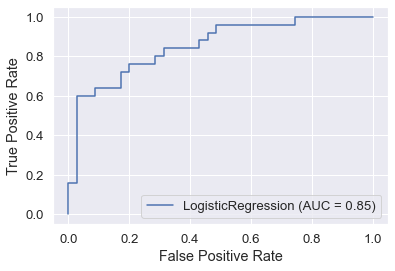

In [16]:
plot_roc_curve(clf, X_test, y_test);

# Feature importance for `LogisticRegression`

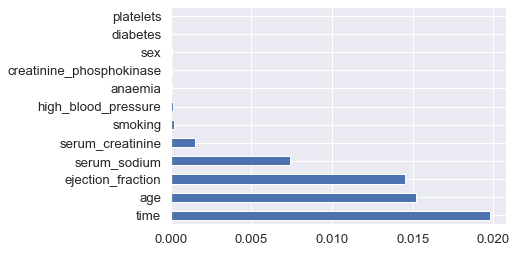

In [17]:
clf_importances = abs(clf.coef_[0])

# Plot feature importance of model
feat_importances = pd.Series(clf_importances, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh');

In [35]:
#sorted(sklearn.metrics.SCORERS.keys())

# Baseline `RandomForestClassifier`

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_preds = rfc.predict(X_test)
acc_score = accuracy_score(y_test, y_preds)
print("Random Forest Accuracy :", acc_score*100,'%')

Random Forest Accuracy : 80.0 %


## Hyperparameter tuning `RandomForestClassifier()`

In [81]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
rf_grid = {"n_estimators": [100, 250, 500, 750, 1000, 1500],
           "max_depth": [None],
           "min_samples_split": np.arange(2, 20, 4),
           "min_samples_leaf": np.arange(1, 20, 4),
           "n_jobs": [-1]}

rf_clf_grid = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=200,
                           verbose=2)

rf_clf_grid.fit(X_train, y_train)

E:\ml-course\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 150 is smaller than n_iter=200. Running 150 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.9s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1

[CV]  n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=1, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-

[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=14, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=14, min_samples_leaf=1, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=14, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=14, min_samples_leaf=1, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=14, min_samples_leaf=1, max_depth=None 


[CV]  n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=1, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=None 
[CV] 

[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_depth=None, total=   0.6s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=2, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=2, min_samples_leaf=5, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=2, min_samples_leaf=5, max_depth=None 
[CV] 

[CV]  n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=10, min_samples_leaf=5, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_depth=None 
[CV] 

[CV]  n_jobs=-1, n_estimators=750, min_samples_split=14, min_samples_leaf=5, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=14, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=14, min_samples_leaf=5, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=14, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=14, min_samples_leaf=5, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=14, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=14, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=14, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=14, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=14, min_samples_leaf=5, max_depth=None 


[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=18, min_samples_leaf=5, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=18, min_samples_leaf=5, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=18, min_samples_leaf=5, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=9, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=9, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=9, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=9, max_depth=None 
[CV]  n_j

[CV]  n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=6, min_samples_leaf=9, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=6, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1

[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=10, min_samples_leaf=9, max_depth=None, total=   0.7s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=10, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=10, min_samples_leaf=9, max_depth=None, total=   0.6s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=10, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=10, min_samples_leaf=9, max_depth=None, total=   0.7s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=9, max_depth=None, total=   0.9s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=9, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=10, min_samples_leaf=9, max_depth=N

[CV]  n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=18, min_samples_leaf=9, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=18, min_samples_leaf=9, max_depth=None 
[CV] 

[CV]  n_jobs=-1, n_estimators=750, min_samples_split=2, min_samples_leaf=13, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=2, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=2, min_samples_leaf=13, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=2, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=2, min_samples_leaf=13, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=13, max_depth=None, total=   0.6s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=13, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=2, min_samples_leaf=13, max_depth=None 


[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=6, min_samples_leaf=13, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=6, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=6, min_samples_leaf=13, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=10, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=10, min_samples_leaf=13, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=10, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=10, min_samples_leaf=13, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=10, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=10, min_samples_leaf=13, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=10, min_samples_leaf=13, max_depth=N

[CV]  n_jobs=-1, n_estimators=250, min_samples_split=14, min_samples_leaf=13, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=14, min_samples_leaf=13, max_depth=N

[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=18, min_samples_leaf=13, m

[CV]  n_jobs=-1, n_estimators=100, min_samples_split=6, min_samples_leaf=17, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=6, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=6, min_samples_leaf=17, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=100, min_samples_split=6, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=100, min_samples_split=6, min_samples_leaf=17, max_depth=None, total=   0.1s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=6, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=6, min_samples_leaf=17, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=6, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=250, min_samples_split=6, min_samples_leaf=17, max_depth=None, total=   0.2s
[CV] n_jobs=-1, n_estimators=250, min_samples_split=6, min_samples_leaf=17, max_depth=None 
[CV] 

[CV]  n_jobs=-1, n_estimators=500, min_samples_split=10, min_samples_leaf=17, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=500, min_samples_split=10, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=500, min_samples_split=10, min_samples_leaf=17, max_depth=None, total=   0.3s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=10, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=10, min_samples_leaf=17, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=10, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=10, min_samples_leaf=17, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=10, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=750, min_samples_split=10, min_samples_leaf=17, max_depth=None, total=   0.4s
[CV] n_jobs=-1, n_estimators=750, min_samples_split=10, min_samples_leaf=17, max_depth=N

[CV]  n_jobs=-1, n_estimators=1000, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=   0.5s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=   0.7s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=   0.8s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None 
[CV]  n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=   0.7s
[CV] n_jobs=-1, n_estimators=1500, min_samples_split=14, min_samples_leaf=17, m

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'max_depth': [None],
                                        'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                                        'min_samples_split': array([ 2,  6, 10, 14, 18]),
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000, 1500],
                                        'n_jobs': [-1]},
                   verbose=2)

In [13]:
rf_clf_grid.best_params_

{'n_jobs': -1,
 'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_depth': None}

In [14]:
rf_clf_grid.score(X_test, y_test)

0.8

## Using the tuned hyperparameters to make a `RandomForestClassifier()` model cross-validated across the entire data

# Cross-validated Metrics

In [39]:
cv_rfc = RandomForestClassifier(n_estimators=500, min_samples_split=6, min_samples_leaf=5, max_depth=None)

rf_metrics = cross_validation_report(cv_rfc, X_train, y_train, 5)
rf_metrics

{'Accuracy': 0.878368794326241,
 'Precision': 0.8633986928104577,
 'Recall': 0.6885714285714286,
 'F1 Score': 0.7615852842809365,
 'AUC Score': 0.906434937611408}

# Evaluating on Test set

In [42]:
rf_best = RandomForestClassifier(n_estimators=500, min_samples_split=6, min_samples_leaf=5, max_depth=None)
rf_best.fit(X_train, y_train)

y_preds = rf_best.predict(X_test)

# Classification Report

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



# Confusion Matrix

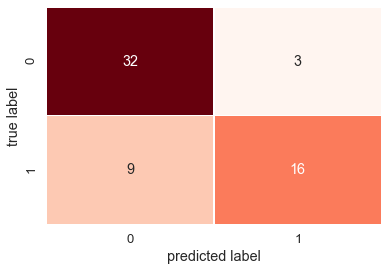

In [43]:
sns.set(font_scale=1.2)
rf_best_conf = confusion_matrix(y_test, y_preds)
sns.heatmap(rf_best_conf, annot=True, fmt='d', linewidths=.5,  
            cmap="Reds", cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

# ROC Curve

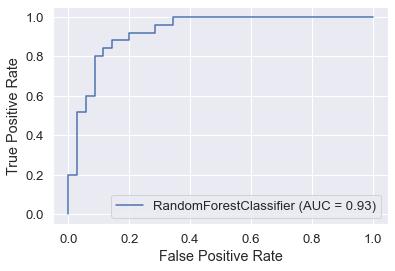

In [45]:
plot_roc_curve(rf_best, X_test, y_test);

# Experimenting with `GaussianNB` Classifier

In [51]:
nb = GaussianNB()
nb.fit(X_train, y_train)

cross_acc = cross_val_score(nb, X_train, y_train, cv=5, scoring="accuracy")
cross_acc.mean()

print("Complement Naive Bayes Accuracy :", (cross_acc.mean())*100,'%')

Complement Naive Bayes Accuracy : 80.72695035460991 %


# Experimenting with `Support Vector Machine`

In [19]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf.score(X_test, y_test)

0.5833333333333334

## Hyperparameter Tuning `SVC()`

In [20]:
svc_grid = {'C': [0.1, 1, 10, 100, 1000],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf']}

sv_clf_grid = RandomizedSearchCV(SVC(),
                                 param_distributions=svc_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=2)
sv_clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] kernel=rbf, gamma=0.0001, C=1000 ................................
[CV] ................. kernel=rbf, gamma=0.0001, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=1000 ................................
[CV] ................. kernel=rbf, gamma=0.0001, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=1000 ................................
[CV] ................. kernel=rbf, gamma=0.0001, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=1000 ................................
[CV] ................. kernel=rbf, gamma=0.0001, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=1000 ................................
[CV] ................. kernel=rbf, gamma=0.0001, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... kernel=rbf, gamma=0.0001, C=10, total=   0.0s
[CV] kernel=rbf, gamma=1, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=100, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] .

[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ....................... kernel=rbf, gamma=0.1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ....................... kernel=rbf, gamma=0.1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [22]:
sv_clf_grid.best_params_

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}

In [29]:
sv_clf = SVC(kernel='rbf', gamma=0.0001, C=1000)
sv_clf.fit(X_train, y_train)
sv_clf.score(X_test, y_test)

0.6166666666666667

## Using the tuned hyperparameters to make a `SVC()` model cross-validated across the entire data

In [40]:
sv_clf = SVC(kernel='rbf', gamma=0.0001, C=1000)

svc_metrics = cross_validation_report(sv_clf, X_train, y_train, 5)
svc_metrics

{'Accuracy': 0.7155141843971632,
 'Precision': 0.7333333333333333,
 'Recall': 0.09904761904761904,
 'F1 Score': 0.16816993464052285,
 'AUC Score': 0.5164463967405143}

# Evaluating on test set

# Confusion Matrix

In [30]:
y_preds = sv_clf.predict(X_test)

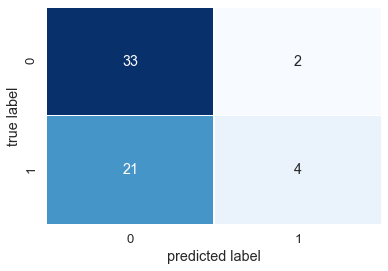

In [31]:
sns.set(font_scale=1.2)
rf_best_conf = confusion_matrix(y_test, y_preds)
sns.heatmap(rf_best_conf, annot=True, fmt='d', linewidths=.5,  
            cmap="Blues", cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

# Classification Report

In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74        35
           1       0.67      0.16      0.26        25

    accuracy                           0.62        60
   macro avg       0.64      0.55      0.50        60
weighted avg       0.63      0.62      0.54        60



# Plot ROC Curve

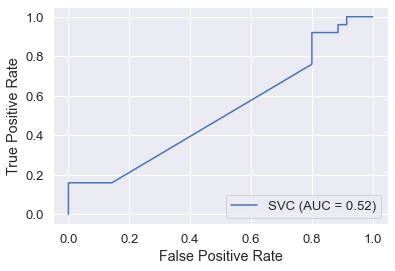

In [33]:
plot_roc_curve(sv_clf, X_test, y_test);